<a href="https://colab.research.google.com/github/aborundiya/NeuralNetwork/blob/master/gradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot  as plt


$S_{w,b}(x)= \frac{1}{1 + exp^-(w*x+b)}$

In [0]:
def sigmoid(w,b,x):
  return 1/(1 + np.exp(-(w*x + b )))

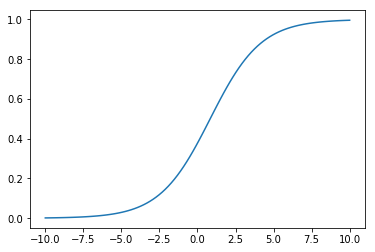

In [19]:
w = 0.6 #@param {type: "slider", min: -2 , max :2 ,step:0.1}
b = -0.5 #@param {type: "slider", min: -5 , max :5 ,step :0.5}
X = np.linspace(-10,10,100)
Y = sigmoid(w,b,X)
plt.plot(X,Y)
plt.show()

In [0]:
def error(w, b,X, Y) :
  err_factor = 0.0 
  for x, y in zip(X,Y):
    fx = sigmoid(w,b,x)
    err_factor += 0.5 * (fx - y)**2 
  return err_factor  


In [0]:
def grad_w(w,b,x,y):
  fx = sigmoid(w,b,x)
  return ((fx- y )* fx*(1-fx)*x)

In [0]:
def grad_b(w,b,x,y):
  fx = sigmoid (w,b,x)
  return ((fx-y)*fx*(1-fx))

In [0]:
def gradient_descent():
  w, b, eta = -2, -2, 1.0 
  max_epochs = 10 
  
  for i in range(max_epochs):
    dw, db = 0, 0
    err.append(error(w,b,X,Y))
    print(err[i])
    plt.show()
    for x, y in zip(X,Y):
      dw = grad_w(w,b,x,y)
      db = grad_b(w,b,x,y)
    w = w + eta * dw 
    b = b + eta * db
    

In [0]:
gradient_descent()

0.4158199010199929
0.4158199010199929
0.41583742701768106
0.4158548072131051
0.41587204372501757
0.41588913862858456
0.4159060939565397
0.41592291170030077
0.4159395938110505
0.4159561422007835
